In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os





# Premier processing: 
 
Le module `first_preprocessing.py` fournit une classe `FirstPreprocessing` qui applique un préprocessing baseline standardisé aux données Tobii brutes. Voici les étapes principales :

### **Suppression de la première ligne et de colonnes inutiles**
- La première ligne et certaines colonnes redondantes ou techniques sont retirées (par défaut les colonnes 1 à 14 et 36 à 38). Cela permet de ne garder que les données pertinentes.

### **Réduction de la fréquence (1 sur 3)**
- Les données Tobii sont souvent trop fines. Cette étape conserve seulement une ligne sur trois, ce qui simplifie l’analyse et réduit le bruit/volume.

### **Filtrage selon la validité des yeux**
- Certains enregistrements d’œil peuvent être invalides (mauvaise détection, blink, etc). Il est possible de garder uniquement les lignes où au moins un œil est valide, ou imposer que les deux yeux soient valides.

### **Remplacement des valeurs NaN de fixation par zéro**
- Quand aucune fixation n’est détectée, `Fixation point X` et `Fixation point Y` sont nulles. On remplace ces NaN par 0, qui indique explicitement « pas de fixation détectée ».



In [5]:
from first_preprocessing import FirstPreprocessing


In [6]:

# Charger les données Tobii
DATA_PATH = "Data/data_G"
PATIENT_ID = "G218"
# Tobii ( TSV)
tobii_file = glob.glob(os.path.join(DATA_PATH, "Tobii", f"{PATIENT_ID}*.tsv"))[0]
tobii_0 = pd.read_csv(tobii_file, sep="\t")
# Créer le preprocesseur
preprocessor = FirstPreprocessing(tobii_0)

# Appliquer toutes les étapes
tobii_cleaned_0 = preprocessor.apply_all_steps(
    columns_to_remove=None,  # Utilise les colonnes par défaut
    require_both_valid=False  # Garde si au moins un œil valide
)

display(tobii_cleaned_0.head())
# Trier par pourcentage de NaN décroissant
nan_percentage = tobii_cleaned_0.isna().mean() * 100
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)
print(nan_percentage_sorted)

/var/folders/t0/gw753q351rbc1y6tksb52wm00000gn/T/ipykernel_81285/2796935016.py:6: DtypeWarning: Columns (20,21,22,26,27,28,32) have mixed types. Specify dtype option on import or set low_memory=False.
  tobii_0 = pd.read_csv(tobii_file, sep="\t")


PREPROCESSING PRÉLIMINAIRE COMPLET
ÉTAPE 1 - Suppression première ligne et colonnes
  - Lignes avant : 481329
  - Colonnes avant : 50
  - Colonnes à supprimer : 17
  - Colonne Sensor conservée (nécessaire pour step3)
  - Lignes après : 481328
  - Colonnes après : 34
  - Colonnes supprimées : ['Computer timestamp', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Recording duration', 'Recording Fixation filter name', 'Event', 'Event value', 'Recording media name', 'Recording media width', 'Recording media height']

ÉTAPE 1.5 - Conversion des types de données
  - Précision float : float32
  - Recording timestamp → Int64
  - Eye movement type index → Int64
  - Validity left → category
  - Validity right → category
  - Eye movement type → category
  - Colonnes numériques converties : 28
  - Mémoire avant : 498.26 MB
  - Mémoire après : 88.61 MB
  - Mémoire économisée : 409.65 MB

,Recording timestamp,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Gyro X,Gyro Y,Gyro Z,Accelerometer X,Accelerometer Y,Accelerometer Z
0,0,518.0,164.0,182.3937,159.6852,456.7096,0.27725,0.35281,0.89368,0.3858,...,15.0,1,0,0,-0.49,-6.0096,-0.9886,-0.0785,-10.4957,1.6944
1,9992,443.0,227.0,78.2738,49.2996,168.003,0.22221,0.39891,0.88966,0.46059,...,15.0,1,0,0,-0.56,-5.6853,-1.2157,-0.1177,-10.4752,1.5785
2,19987,515.0,181.0,201.7042,167.8608,501.9391,0.19125,0.34358,0.91944,0.47354,...,30.0,1,0,0,-0.84,-6.3422,-1.1183,-0.1177,-10.4639,1.7398
3,29972,416.0,205.0,174.1083,111.0098,354.64,0.32536,0.30787,0.89407,0.45439,...,30.0,1,0,0,-0.91,-6.1597,-0.944,-0.0785,-10.4821,1.6171
4,39966,267.0,193.0,251.7316,130.3831,401.6093,NaN,NaN,NaN,0.53036,...,30.0,1,0,0,-0.49,-6.4151,-0.7047,-0.0785,-10.4821,1.6171


Pupil position left X      34.555024
Pupil diameter left        34.555024
Gaze direction left X      34.555024
Gaze direction left Y      34.555024
Gaze direction left Z      34.555024
Pupil position left Z      34.555024
Pupil position left Y      34.555024
Pupil position right Y      6.119020
Pupil diameter right        6.119020
Pupil position right Z      6.119020
Pupil position right X      6.119020
Gaze direction right Z      6.119020
Gaze direction right Y      6.119020
Gaze direction right X      6.119020
Gaze event duration         0.000000
Gyro Y                      0.000000
Gyro X                      0.000000
Gyro Z                      0.000000
Accelerometer X             0.000000
Accelerometer Y             0.000000
Fixation point Y            0.000000
Fixation point X            0.000000
Eye movement type index     0.000000
Recording timestamp         0.000000
Eye movement type           0.000000
Validity right              0.000000
Validity left               0.000000
G

In [7]:

# Charger les données Tobii
DATA_PATH = "Data/data_G"
PATIENT_ID = "G230"
# Tobii ( TSV)
tobii_file = glob.glob(os.path.join(DATA_PATH, "Tobii", f"{PATIENT_ID}*.tsv"))[0]
tobii_1 = pd.read_csv(tobii_file, sep="\t")
# Créer le preprocesseur
preprocessor = FirstPreprocessing(tobii_1)

# Appliquer toutes les étapes
tobii_cleaned_1 = preprocessor.apply_all_steps(
    columns_to_remove=None,  # Utilise les colonnes par défaut
    require_both_valid=False  # Garde si au moins un œil valide
)

display(tobii_cleaned_1.head())
# Trier par pourcentage de NaN décroissant
nan_percentage = tobii_cleaned_1.isna().mean() * 100
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)
print(nan_percentage_sorted)



PREPROCESSING PRÉLIMINAIRE COMPLET
ÉTAPE 1 - Suppression première ligne et colonnes
  - Lignes avant : 562301
  - Colonnes avant : 50
  - Colonnes à supprimer : 17
  - Colonne Sensor conservée (nécessaire pour step3)
  - Lignes après : 562300
  - Colonnes après : 34
  - Colonnes supprimées : ['Computer timestamp', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Recording duration', 'Recording Fixation filter name', 'Event', 'Event value', 'Recording media name', 'Recording media width', 'Recording media height']

ÉTAPE 1.5 - Conversion des types de données
  - Précision float : float32
  - Recording timestamp → Int64
  - Eye movement type index → Int64
  - Validity left → category
  - Validity right → category
  - Eye movement type → category
  - Colonnes numériques converties : 28
  - Mémoire avant : 615.48 MB
  - Mémoire après : 103.51 MB
  - Mémoire économisée : 511.97 M

,Recording timestamp,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Gyro X,Gyro Y,Gyro Z,Accelerometer X,Accelerometer Y,Accelerometer Z
0,0,1198.0,976.0,-59.2348,-101.871,285.6532,-0.25988,-0.23009,0.93783,NaN,...,15.0,1,0,0,-3.57,-19.8136,22.877,1.1376,-8.6363,6.2842
1,9992,1197.0,978.0,-60.2696,-104.5896,292.2577,-0.2385,-0.19944,0.95044,-0.0907,...,120.0,1,1182.0,1001.0,-1.89,-20.272,21.4456,1.1768,-8.6431,6.3228
2,19985,1189.0,979.0,-63.1979,-113.5813,316.5304,-0.2476,-0.24139,0.93831,NaN,...,120.0,1,1182.0,1001.0,0.49,-20.998,20.3225,1.2553,-8.6567,6.4001
3,29975,1179.0,967.0,-79.6718,-145.9268,418.1433,-0.21716,-0.23393,0.94769,-0.10216,...,120.0,1,1182.0,1001.0,3.22,-21.3143,19.6981,1.2553,-8.6908,6.5933
4,49960,1190.0,976.0,-70.4622,-125.79,352.6534,-0.22779,-0.22116,0.94826,-0.10013,...,120.0,1,1182.0,1001.0,5.25,-21.8742,18.0356,1.2553,-8.743,6.6637


Pupil position right Y     1.369196
Gaze direction right X     1.369196
Pupil diameter right       1.369196
Pupil position right Z     1.369196
Pupil position right X     1.369196
Gaze direction right Y     1.369196
Gaze direction right Z     1.369196
Gaze direction left Y      0.564493
Gaze direction left Z      0.564493
Gaze direction left X      0.564493
Pupil position left X      0.564493
Pupil position left Y      0.564493
Pupil position left Z      0.564493
Pupil diameter left        0.564493
Gyro Y                     0.000000
Gaze event duration        0.000000
Gyro Z                     0.000000
Gyro X                     0.000000
Accelerometer X            0.000000
Accelerometer Y            0.000000
Fixation point Y           0.000000
Fixation point X           0.000000
Eye movement type index    0.000000
Recording timestamp        0.000000
Eye movement type          0.000000
Validity right             0.000000
Validity left              0.000000
Gaze point X               0

In [8]:
"""# Charger les données Tobii
DATA_PATH = "Data/data_L"
PATIENT_ID = "L260"
# Tobii ( TSV)
tobii_file = glob.glob(os.path.join(DATA_PATH, "Tobii", f"{PATIENT_ID}*.tsv"))[0]
tobii_2 = pd.read_csv(tobii_file, sep="\t")
# Créer le preprocesseur
preprocessor = FirstPreprocessing(tobii_2)

# Appliquer toutes les étapes
tobii_cleaned_2 = preprocessor.apply_all_steps(
    columns_to_remove=None,  # Utilise les colonnes par défaut
    require_both_valid=False  # Garde si au moins un œil valide
)

display(tobii_cleaned_2.head())
# Trier par pourcentage de NaN décroissant
nan_percentage = tobii_cleaned_2.isna().mean() * 100
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)
print(nan_percentage_sorted)"""

'# Charger les données Tobii\nDATA_PATH = "Data/data_L"\nPATIENT_ID = "L260"\n# Tobii ( TSV)\ntobii_file = glob.glob(os.path.join(DATA_PATH, "Tobii", f"{PATIENT_ID}*.tsv"))[0]\ntobii_2 = pd.read_csv(tobii_file, sep="\t")\n# Créer le preprocesseur\npreprocessor = FirstPreprocessing(tobii_2)\n\n# Appliquer toutes les étapes\ntobii_cleaned_2 = preprocessor.apply_all_steps(\n    columns_to_remove=None,  # Utilise les colonnes par défaut\n    require_both_valid=False  # Garde si au moins un œil valide\n)\n\ndisplay(tobii_cleaned_2.head())\n# Trier par pourcentage de NaN décroissant\nnan_percentage = tobii_cleaned_2.isna().mean() * 100\nnan_percentage_sorted = nan_percentage.sort_values(ascending=False)\nprint(nan_percentage_sorted)'

In [10]:
def analyze_nan_distribution(data, timestamp_col='Recording timestamp', 
                            max_gap_display=5):
    """
    Analyse la distribution des NaN dans les colonnes
    
    Détecte si les NaN sont groupés (gaps) ou dispersés,
    et donne des recommandations sur l'interpolation.
    
    Parameters:
    -----------
    data : DataFrame
        Données à analyser
    timestamp_col : str
        Colonne timestamp pour l'analyse temporelle
    max_gap_display : int
        Nombre maximum de gaps à afficher par colonne
    
    Returns:
    --------
    dict : Rapport d'analyse par colonne
    """
    import pandas as pd
    import numpy as np
    
    report = {}
    
    print(f"{'='*80}")
    print(f"ANALYSE DE LA DISTRIBUTION DES NaN")
    print(f"{'='*80}\n")
    
    # Analyser chaque colonne avec des NaN
    nan_cols = data.columns[data.isna().any()].tolist()
    
    if not nan_cols:
        print("Aucune colonne avec des NaN")
        return {}
    
    for col in nan_cols:
        print(f"\n{'-'*80}")
        print(f"COLONNE : {col}")
        print(f"{'-'*80}")
        
        nan_mask = data[col].isna()
        n_nan = nan_mask.sum()
        n_total = len(data)
        nan_pct = (n_nan / n_total) * 100
        
        print(f"Pourcentage de NaN : {nan_pct:.2f}% ({n_nan}/{n_total})")
        
        # Analyser la distribution temporelle si timestamp disponible
        if timestamp_col in data.columns:
            timestamps = data[timestamp_col].values
            
            # Identifier les gaps (NaN consécutifs)
            gaps = []
            in_gap = False
            gap_start = None
            
            for i, is_nan in enumerate(nan_mask):
                if is_nan and not in_gap:
                    gap_start = i
                    in_gap = True
                elif not is_nan and in_gap:
                    gap_end = i - 1
                    gap_duration_ms = timestamps[gap_end] - timestamps[gap_start]
                    gaps.append({
                        'start_idx': gap_start,
                        'end_idx': gap_end,
                        'start_time': timestamps[gap_start],
                        'end_time': timestamps[gap_end],
                        'duration_ms': gap_duration_ms,
                        'duration_s': gap_duration_ms / 1000,
                        'length': gap_end - gap_start + 1
                    })
                    in_gap = False
            
            # Gérer le dernier gap si la série se termine par NaN
            if in_gap:
                gap_end = len(nan_mask) - 1
                gap_duration_ms = timestamps[gap_end] - timestamps[gap_start]
                gaps.append({
                    'start_idx': gap_start,
                    'end_idx': gap_end,
                    'start_time': timestamps[gap_start],
                    'end_time': timestamps[gap_end],
                    'duration_ms': gap_duration_ms,
                    'duration_s': gap_duration_ms / 1000,
                    'length': gap_end - gap_start + 1
                })
            
            n_gaps = len(gaps)
            
            if n_gaps > 0:
                gap_lengths = [g['length'] for g in gaps]
                gap_durations = [g['duration_s'] for g in gaps]
                
                print(f"\nNombre de gaps (NaN consécutifs) : {n_gaps}")
                print(f"Longueur moyenne des gaps : {np.mean(gap_lengths):.1f} échantillons")
                print(f"Durée moyenne des gaps : {np.mean(gap_durations):.2f} secondes")
                print(f"Durée médiane des gaps : {np.median(gap_durations):.2f} secondes")
                print(f"Durée max des gaps : {np.max(gap_durations):.2f} secondes")
                print(f"Durée min des gaps : {np.min(gap_durations):.4f} secondes")
                
                # Classification de la distribution
                if n_gaps < n_nan * 0.1:  # Peu de gaps mais beaucoup de NaN
                    distribution_type = "GROUPÉE (gaps longs)"
                    print(f"\n✓ Distribution : {distribution_type}")
                    print(f"  → Les NaN sont groupés en {n_gaps} gaps")
                    print(f"  → Interpolation possible sur gaps courts (< 1s)")
                elif n_gaps > n_nan * 0.5:  # Beaucoup de gaps courts
                    distribution_type = "DISPERSÉE (gaps courts)"
                    print(f"\n✓ Distribution : {distribution_type}")
                    print(f"  → Les NaN sont dispersés ({n_gaps} gaps)")
                    print(f"  → Interpolation possible mais attention aux artefacts")
                else:
                    distribution_type = "MIXTE"
                    print(f"\n✓ Distribution : {distribution_type}")
                    print(f"  → Mélange de gaps longs et courts")
                
                # Recommandations
                median_gap_s = np.median(gap_durations)
                p75_gap_s = np.percentile(gap_durations, 75)
                
                print(f"\nRecommandations d'interpolation :")
                if median_gap_s < 0.5:
                    print(f"  ✓ Gaps courts (médiane {median_gap_s:.2f}s) → Interpolation linéaire OK")
                    max_gap_interp = p75_gap_s
                elif median_gap_s < 2.0:
                    print(f"  ⚠ Gaps moyens (médiane {median_gap_s:.2f}s) → Interpolation limitée")
                    max_gap_interp = median_gap_s
                else:
                    print(f"  ✗ Gaps longs (médiane {median_gap_s:.2f}s) → Éviter interpolation")
                    max_gap_interp = 0.5
                
                print(f"  → Seuil recommandé : {max_gap_interp:.2f} secondes ({max_gap_interp*1000:.0f} ms)")
                
                # Afficher les plus grands gaps
                gaps_sorted = sorted(gaps, key=lambda x: x['duration_s'], reverse=True)
                print(f"\nTop {min(max_gap_display, len(gaps_sorted))} plus grands gaps :")
                for i, gap in enumerate(gaps_sorted[:max_gap_display], 1):
                    print(f"  {i}. Durée: {gap['duration_s']:.2f}s, "
                          f"Longueur: {gap['length']} échantillons, "
                          f"Timestamp: {gap['start_time']:.0f} → {gap['end_time']:.0f}")
            else:
                print("\nAucun gap détecté (NaN isolés)")
                distribution_type = "DISPERSÉE (NaN isolés)"
        
        # Stocker dans le rapport
        report[col] = {
            'nan_percentage': nan_pct,
            'nan_count': n_nan,
            'total_count': n_total,
            'n_gaps': n_gaps if 'n_gaps' in locals() else 0,
            'distribution_type': distribution_type if 'distribution_type' in locals() else 'UNKNOWN',
            'gaps': gaps if 'gaps' in locals() else [],
            'max_gap_interp_s': max_gap_interp if 'max_gap_interp' in locals() else None
        }
    
    # Résumé global
    print(f"\n{'='*80}")
    print(f"RÉSUMÉ GLOBAL")
    print(f"{'='*80}")
    
    left_cols = [col for col in nan_cols if 'left' in col.lower()]
    right_cols = [col for col in nan_cols if 'right' in col.lower() and 'left' not in col.lower()]
    
    if left_cols:
        left_nan_pct = np.mean([report[col]['nan_percentage'] for col in left_cols])
        print(f"\nColonnes LEFT (œil gauche) :")
        print(f"  - NaN moyen : {left_nan_pct:.2f}%")
        print(f"  - Interprétation : Problème de suivi œil gauche")
    
    if right_cols:
        right_nan_pct = np.mean([report[col]['nan_percentage'] for col in right_cols])
        print(f"\nColonnes RIGHT (œil droit) :")
        print(f"  - NaN moyen : {right_nan_pct:.2f}%")
        print(f"  - Interprétation : Meilleur suivi que l'œil gauche")
    
    return report

# Utilisation
nan_report = analyze_nan_distribution(tobii_cleaned_1)

ANALYSE DE LA DISTRIBUTION DES NaN


--------------------------------------------------------------------------------
COLONNE : Gaze direction left X
--------------------------------------------------------------------------------
Pourcentage de NaN : 0.56% (846/149869)

Nombre de gaps (NaN consécutifs) : 706
Longueur moyenne des gaps : 1.2 échantillons
Durée moyenne des gaps : 5.93 secondes
Durée médiane des gaps : 0.00 secondes
Durée max des gaps : 469.73 secondes
Durée min des gaps : 0.0000 secondes

✓ Distribution : DISPERSÉE (gaps courts)
  → Les NaN sont dispersés (706 gaps)
  → Interpolation possible mais attention aux artefacts

Recommandations d'interpolation :
  ✓ Gaps courts (médiane 0.00s) → Interpolation linéaire OK
  → Seuil recommandé : 0.00 secondes (0 ms)

Top 5 plus grands gaps :
  1. Durée: 469.73s, Longueur: 2 échantillons, Timestamp: 114692577 → 115162308
  2. Durée: 239.86s, Longueur: 5 échantillons, Timestamp: 21127586 → 21367447
  3. Durée: 129.92s, Longueur: 6 

# Analyse temporelle

In [11]:
tobii_cleaned_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63082 entries, 0 to 63081
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Recording timestamp      63082 non-null  int64 
 1   Gaze point X             63082 non-null  object
 2   Gaze point Y             63082 non-null  object
 3   Gaze point 3D X          63082 non-null  object
 4   Gaze point 3D Y          63082 non-null  object
 5   Gaze point 3D Z          63082 non-null  object
 6   Gaze direction left X    41284 non-null  object
 7   Gaze direction left Y    41284 non-null  object
 8   Gaze direction left Z    41284 non-null  object
 9   Gaze direction right X   59222 non-null  object
 10  Gaze direction right Y   59222 non-null  object
 11  Gaze direction right Z   59222 non-null  object
 12  Pupil position left X    41284 non-null  object
 13  Pupil position left Y    41284 non-null  object
 14  Pupil position left Z    41284 non-nul

In [50]:
def plot_column_timeseries(tobii_cleaned, column_index, 
                           eye_movement_types=None, 
                           max_movements=None,
                           movement_col='Eye movement type'):
    """
    Visualise rapidement une colonne avec gestion des NaN.
    Permet de filtrer par type de mouvement oculaire et limiter le nombre affiché.
    
    Parameters:
    -----------
    tobii_cleaned : DataFrame
        Données Tobii préprocessées
    column_index : int
        Index de la colonne à visualiser
    eye_movement_types : list of str, optional
        Types de mouvements à afficher (ex: ['Saccade', 'Fixation'])
        Si None, affiche tous les types
    max_movements : int, optional
        Nombre maximum de mouvements à afficher (par type si plusieurs types)
        Si None, affiche tous les mouvements
    movement_col : str
        Nom de la colonne contenant les types de mouvement (défaut: 'Eye movement type')
    """
    
    data_col = tobii_cleaned.columns[column_index]
    
    # Extraire les données
    timestamps = tobii_cleaned['Recording timestamp']
    values = pd.to_numeric(
        tobii_cleaned[data_col].astype(str).str.replace(',', '.'), 
        errors='coerce'
    )
    
    # Filtrer par type de mouvement si demandé
    if movement_col in tobii_cleaned.columns and eye_movement_types is not None:
        # Convertir en liste si string unique
        if isinstance(eye_movement_types, str):
            eye_movement_types = [eye_movement_types]
        
        # Filtrer les données
        movement_mask = tobii_cleaned[movement_col].isin(eye_movement_types)
        filtered_indices = tobii_cleaned.index[movement_mask]
        
        print(f"Filtrage par type de mouvement : {eye_movement_types}")
        print(f"  - Lignes totales : {len(tobii_cleaned)}")
        print(f"  - Lignes après filtrage : {movement_mask.sum()}")
        
        # Limiter le nombre de mouvements si demandé
        if max_movements is not None and max_movements > 0:
            # Identifier les segments de mouvements consécutifs
            movement_data = tobii_cleaned.loc[filtered_indices, movement_col]
            
            # Trouver les transitions entre mouvements (changements de type)
            movement_changes = (movement_data != movement_data.shift()).cumsum()
            
            # Compter les segments uniques par type
            segments_by_type = {}
            for mov_type in eye_movement_types:
                type_mask = movement_data == mov_type
                if type_mask.any():
                    segments = movement_changes[type_mask].unique()
                    segments_by_type[mov_type] = segments
            
            # Sélectionner les N premiers segments de chaque type
            selected_indices = []
            for mov_type, segments in segments_by_type.items():
                n_segments = min(max_movements, len(segments))
                selected_segments = segments[:n_segments]
                
                for seg in selected_segments:
                    seg_mask = (movement_changes == seg) & (movement_data == mov_type)
                    selected_indices.extend(filtered_indices[seg_mask])
            
            selected_indices = pd.Index(selected_indices).unique().sort_values()
            filtered_indices = selected_indices
            
            print(f"  - Limitation à {max_movements} mouvements par type")
            print(f"  - Lignes après limitation : {len(filtered_indices)}")
        
        # Appliquer le filtre
        timestamps = timestamps.loc[filtered_indices]
        values = values.loc[filtered_indices]
        
        # Mettre à jour le titre avec les types filtrés
        title_suffix = f" - Types: {', '.join(eye_movement_types)}"
        if max_movements:
            title_suffix += f" (max {max_movements} par type)"
    else:
        title_suffix = ""
        if movement_col not in tobii_cleaned.columns:
            print(f"⚠️ Colonne '{movement_col}' non trouvée - pas de filtrage par mouvement")
    
    # Créer la figure
    plt.figure(figsize=(15, 5))
    
    # Tracer les données valides
    valid_mask = ~values.isna()
    plt.plot(timestamps[valid_mask], values[valid_mask], 
            'b-', linewidth=0.5, alpha=0.7, label='Données valides')
    
    # Si filtrage par mouvement, colorier par type
    if movement_col in tobii_cleaned.columns and eye_movement_types is not None:
        # Récupérer les types de mouvement pour les indices filtrés
        if 'filtered_indices' in locals():
            movement_types_filtered = tobii_cleaned.loc[filtered_indices, movement_col]
        else:
            movement_types_filtered = tobii_cleaned[movement_col]
        
        # Couleurs par type
        color_map = {
            'Fixation': 'green',
            'Saccade': 'red',
            'Blink': 'orange',
            'Unclassified': 'gray',
            'EyesNotFound': 'purple'
        }
        
        # Tracer chaque type avec une couleur différente
        for mov_type in eye_movement_types:
            type_mask = (movement_types_filtered == mov_type) & valid_mask
            if type_mask.any():
                color = color_map.get(mov_type, 'blue')
                plt.plot(timestamps[type_mask], values[type_mask], 
                        color=color, linewidth=0.8, alpha=0.6, 
                        label=f'{mov_type}')
    else:
        # Interpoler et tracer en pointillés pour montrer les interpolations
        values_interp = values.interpolate(method='linear')
        nan_mask = values.isna()
        if nan_mask.any():
            plt.plot(timestamps[nan_mask], values_interp[nan_mask], 
                    'r--', linewidth=0.3, alpha=0.5, label='Interpolation')
    
    plt.xlabel('Recording timestamp')
    plt.ylabel(data_col)
    plt.title(f'Série temporelle - {data_col}{title_suffix}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Afficher les stats
    nan_pct = (values.isna().sum() / len(values)) * 100
    stats_text = f'NaN: {values.isna().sum()}/{len(values)} ({nan_pct:.2f}%)'
    
    # Ajouter info sur les types de mouvement si filtré
    if movement_col in tobii_cleaned.columns and eye_movement_types is not None:
        if 'filtered_indices' in locals():
            movement_types_filtered = tobii_cleaned.loc[filtered_indices, movement_col]
        else:
            movement_types_filtered = tobii_cleaned[movement_col]
        
        movement_counts = movement_types_filtered.value_counts()
        stats_text += f'\nMouvements: {dict(movement_counts)}'
    
    plt.text(0.02, 0.98, 
            stats_text,
            transform=plt.gca().transAxes, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# FONCTION UTILITAIRE : Lister les types de mouvement disponibles
# ============================================================================

def list_eye_movement_types(tobii_cleaned, movement_col='Eye movement type'):
    """
    Liste les types de mouvement oculaire disponibles dans les données.
    
    Parameters:
    -----------
    tobii_cleaned : DataFrame
        Données Tobii
    movement_col : str
        Nom de la colonne contenant les types de mouvement
    
    Returns:
    --------
    dict : Dictionnaire avec types et leurs comptes
    """
    if movement_col not in tobii_cleaned.columns:
        print(f"⚠️ Colonne '{movement_col}' non trouvée")
        return {}
    
    movement_counts = tobii_cleaned[movement_col].value_counts()
    
    print("="*60)
    print("TYPES DE MOUVEMENT OCULAIRE DISPONIBLES")
    print("="*60)
    for mov_type, count in movement_counts.items():
        pct = (count / len(tobii_cleaned)) * 100
        print(f"  {mov_type:20s} : {count:8,} ({pct:5.2f}%)")
    
    return movement_counts.to_dict()

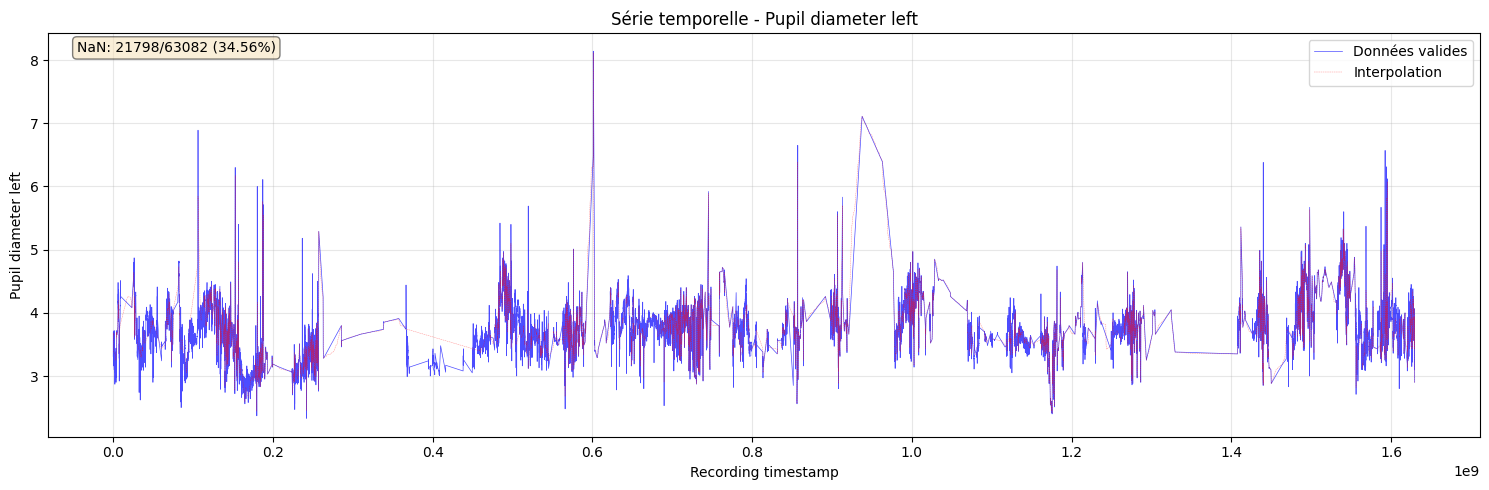

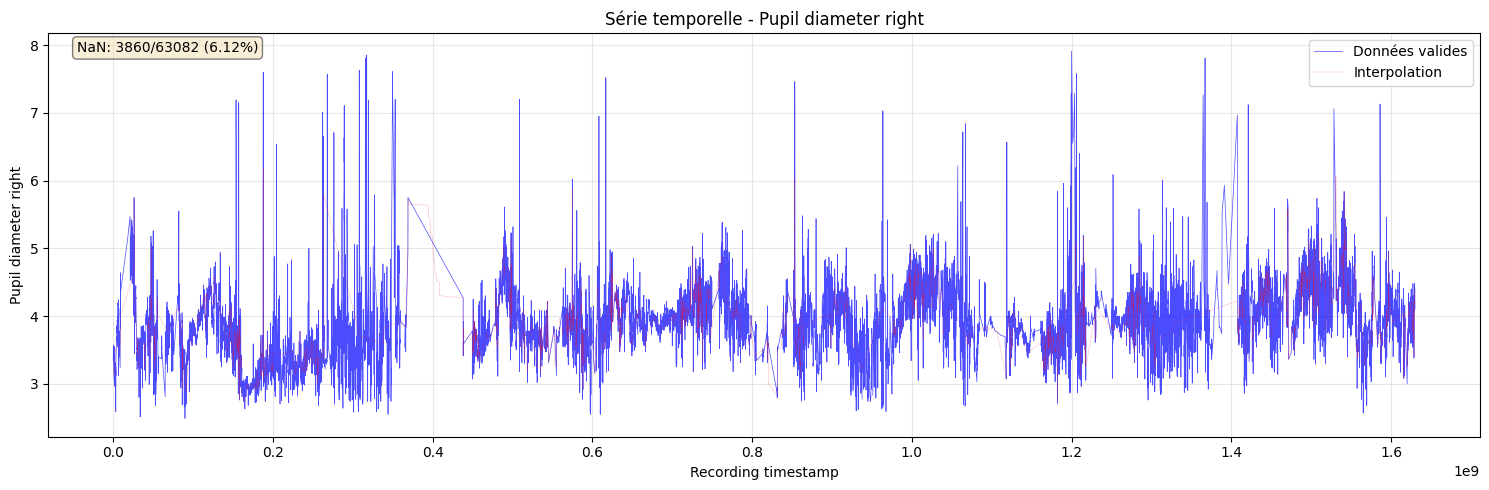

In [ ]:

plot_column_timeseries(tobii_cleaned_0, column_index=18)
plot_column_timeseries(tobii_cleaned_0, column_index=19)

ANALYSE DE LA RÉGULARITÉ DES TIMESTAMPS

Colonne analysée : Recording timestamp
Nombre total de points : 63,082
Durée totale : 1,629,787,072.00 ms (1629787.07 s)

────────────────────────────────────────────────────────────────────────────────
STATISTIQUES SUR LES INTERVALLES
────────────────────────────────────────────────────────────────────────────────
Intervalle moyen     : 25836.4178 ms
Intervalle médian    : 9995.0000 ms
Écart-type           : 202930.5192 ms
Intervalle minimum   : 9929.0000 ms
Intervalle maximum   : 23825662.0000 ms
Coefficient de variation (CV) : 7.8544

────────────────────────────────────────────────────────────────────────────────
RÉGULARITÉ
────────────────────────────────────────────────────────────────────────────────
⚠ ÉCHANTILLONNAGE IRRÉGULIER (CV ≥ 0.1)
  → Les timestamps ne sont pas régulièrement espacés
  → Écart-type élevé : 202930.52 ms

────────────────────────────────────────────────────────────────────────────────
FRÉQUENCE D'ÉCHANTILLONNAGE
───

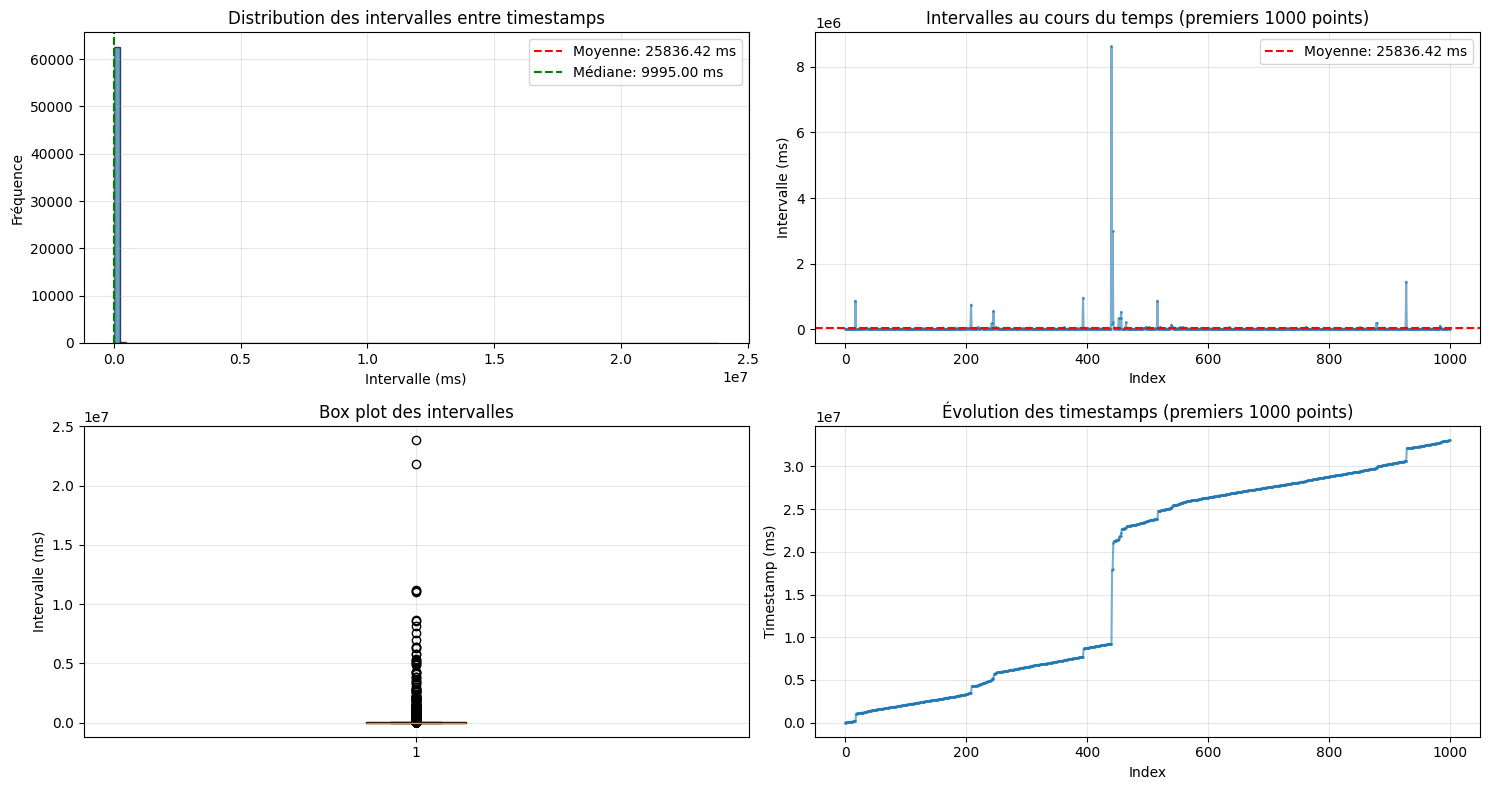

In [13]:
def analyze_timestamp_regularity(df, timestamp_col='Recording timestamp', plot=True, figsize=(15, 8)):
    """
    Analyse la régularité des timestamps et calcule la fréquence d'échantillonnage.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe contenant les données
    timestamp_col : str
        Le nom de la colonne contenant les timestamps
    plot : bool
        Si True, affiche des graphiques de visualisation
    figsize : tuple
        Taille de la figure
    
    Returns:
    --------
    dict : Dictionnaire contenant les résultats de l'analyse
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    timestamps = df[timestamp_col].values
    
    # Calculer les intervalles entre timestamps consécutifs
    intervals = np.diff(timestamps)
    
    # Statistiques sur les intervalles
    mean_interval = np.mean(intervals)
    median_interval = np.median(intervals)
    std_interval = np.std(intervals)
    min_interval = np.min(intervals)
    max_interval = np.max(intervals)
    
    # Coefficient de variation (std/mean) pour mesurer la régularité
    # Si CV < 0.1, on considère que c'est régulier
    cv = std_interval / mean_interval if mean_interval > 0 else np.inf
    
    # Déterminer si l'échantillonnage est régulier
    is_regular = cv < 0.1
    
    # Calculer la fréquence
    if is_regular:
        # Fréquence en Hz (échantillons par seconde)
        frequency_hz = 1000.0 / mean_interval  # timestamps en ms
        frequency_text = f"{frequency_hz:.4f} Hz"
    else:
        # Fréquence moyenne et médiane
        frequency_mean_hz = 1000.0 / mean_interval
        frequency_median_hz = 1000.0 / median_interval
        frequency_text = f"Moyenne: {frequency_mean_hz:.4f} Hz, Médiane: {frequency_median_hz:.4f} Hz"
    
    # Afficher les résultats
    print("="*80)
    print("ANALYSE DE LA RÉGULARITÉ DES TIMESTAMPS")
    print("="*80)
    print(f"\nColonne analysée : {timestamp_col}")
    print(f"Nombre total de points : {len(timestamps):,}")
    print(f"Durée totale : {timestamps[-1] - timestamps[0]:,.2f} ms ({((timestamps[-1] - timestamps[0])/1000):.2f} s)")
    
    print(f"\n{'─'*80}")
    print("STATISTIQUES SUR LES INTERVALLES")
    print(f"{'─'*80}")
    print(f"Intervalle moyen     : {mean_interval:.4f} ms")
    print(f"Intervalle médian    : {median_interval:.4f} ms")
    print(f"Écart-type           : {std_interval:.4f} ms")
    print(f"Intervalle minimum   : {min_interval:.4f} ms")
    print(f"Intervalle maximum   : {max_interval:.4f} ms")
    print(f"Coefficient de variation (CV) : {cv:.4f}")
    
    print(f"\n{'─'*80}")
    print("RÉGULARITÉ")
    print(f"{'─'*80}")
    if is_regular:
        print(f"✓ ÉCHANTILLONNAGE RÉGULIER (CV < 0.1)")
        print(f"  → Les timestamps sont régulièrement espacés")
    else:
        print(f"⚠ ÉCHANTILLONNAGE IRRÉGULIER (CV ≥ 0.1)")
        print(f"  → Les timestamps ne sont pas régulièrement espacés")
        print(f"  → Écart-type élevé : {std_interval:.2f} ms")
    
    print(f"\n{'─'*80}")
    print("FRÉQUENCE D'ÉCHANTILLONNAGE")
    print(f"{'─'*80}")
    print(f"Fréquence : {frequency_text}")
    
    # Analyse des percentiles pour mieux comprendre la distribution
    percentiles = [5, 25, 50, 75, 95, 99]
    print(f"\n{'─'*80}")
    print("PERCENTILES DES INTERVALLES")
    print(f"{'─'*80}")
    for p in percentiles:
        val = np.percentile(intervals, p)
        freq = 1000.0 / val if val > 0 else 0
        print(f"  {p:2d}% : {val:8.2f} ms ({freq:.4f} Hz)")
    
    # Identifier les gaps anormaux (intervalles > 3 * écart-type)
    threshold = mean_interval + 3 * std_interval
    large_gaps = intervals > threshold
    n_large_gaps = large_gaps.sum()
    
    if n_large_gaps > 0:
        print(f"\n{'─'*80}")
        print("GAPS ANORMAUX (intervalles > moyenne + 3*écart-type)")
        print(f"{'─'*80}")
        print(f"Nombre de gaps anormaux : {n_large_gaps} ({100*n_large_gaps/len(intervals):.2f}%)")
        print(f"Seuil : {threshold:.2f} ms")
        large_gap_values = intervals[large_gaps]
        print(f"Gap maximum : {np.max(large_gap_values):.2f} ms")
        print(f"Gap moyen (gaps anormaux) : {np.mean(large_gap_values):.2f} ms")
    
    # Visualisation
    if plot:
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        
        # 1. Distribution des intervalles (histogramme)
        ax1 = axes[0, 0]
        ax1.hist(intervals, bins=min(100, len(np.unique(intervals))), edgecolor='black', alpha=0.7)
        ax1.axvline(mean_interval, color='r', linestyle='--', label=f'Moyenne: {mean_interval:.2f} ms')
        ax1.axvline(median_interval, color='g', linestyle='--', label=f'Médiane: {median_interval:.2f} ms')
        ax1.set_xlabel('Intervalle (ms)')
        ax1.set_ylabel('Fréquence')
        ax1.set_title('Distribution des intervalles entre timestamps')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Intervalles au cours du temps (premiers 1000 points pour lisibilité)
        ax2 = axes[0, 1]
        n_show = min(1000, len(intervals))
        ax2.plot(range(n_show), intervals[:n_show], marker='.', markersize=2, alpha=0.6)
        ax2.axhline(mean_interval, color='r', linestyle='--', label=f'Moyenne: {mean_interval:.2f} ms')
        ax2.set_xlabel('Index')
        ax2.set_ylabel('Intervalle (ms)')
        ax2.set_title(f'Intervalles au cours du temps (premiers {n_show} points)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Box plot des intervalles
        ax3 = axes[1, 0]
        bp = ax3.boxplot(intervals, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        ax3.set_ylabel('Intervalle (ms)')
        ax3.set_title('Box plot des intervalles')
        ax3.grid(True, alpha=0.3)
        
        # 4. Timestamps au cours du temps (premiers 1000 points)
        ax4 = axes[1, 1]
        n_show = min(1000, len(timestamps))
        ax4.plot(range(n_show), timestamps[:n_show], marker='.', markersize=2, alpha=0.6)
        ax4.set_xlabel('Index')
        ax4.set_ylabel('Timestamp (ms)')
        ax4.set_title(f'Évolution des timestamps (premiers {n_show} points)')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Retourner les résultats
    results = {
        'is_regular': is_regular,
        'mean_interval_ms': mean_interval,
        'median_interval_ms': median_interval,
        'std_interval_ms': std_interval,
        'cv': cv,
        'frequency_hz': 1000.0 / mean_interval if mean_interval > 0 else None,
        'frequency_text': frequency_text,
        'min_interval_ms': min_interval,
        'max_interval_ms': max_interval,
        'n_points': len(timestamps),
        'total_duration_ms': timestamps[-1] - timestamps[0],
        'n_large_gaps': n_large_gaps,
        'intervals': intervals
    }
    
    return results

# Exemple d'utilisation :
results = analyze_timestamp_regularity(tobii_cleaned_0)

In [14]:
from preprocessing_pipeline import *

In [32]:
# ============================================================================
# EXPLICATION DES PARAMÈTRES DE PREPROCESSING
# ============================================================================

"""
1. ARTIFACT_DETECTION - Détection des valeurs aberrantes
   ──────────────────────────────────────────────────────
   
   method: 'both' | 'statistical' | 'iqr'
   - 'both' : Combine Z-score ET IQR (plus robuste, recommandé)
   - 'statistical' : Seulement Z-score (détecte valeurs extrêmes)
   - 'iqr' : Seulement IQR (plus robuste aux distributions non-normales)
   
   z_threshold: float (défaut: 3)
   - Seuil pour Z-score : nombre d'écarts-types
   - Plus bas (2) = plus agressif (détecte plus d'artefacts)
   - Plus haut (4) = plus conservateur (garde plus de données)
   - Effet : Élimine les pics/bruits extrêmes
   
   iqr_factor: float (défaut: 1.5)
   - Facteur pour IQR : Q1 - factor*IQR à Q3 + factor*IQR
   - Plus bas (1.0) = plus agressif
   - Plus haut (2.0) = plus conservateur
   - Effet : Élimine les valeurs hors de la distribution normale

2. RESAMPLING - Rééchantillonnage temporel
   ────────────────────────────────────────
   
   enabled: bool (défaut: False dans votre config)
   - False : Garde les timestamps originaux (irréguliers)
   - True : Crée un index temporel uniforme
   - Effet : Si False, préserve la structure temporelle originale
   
   target_interval_ms: float | None
   - Intervalle cible en millisecondes
   - None : Auto-détection (médiane des intervalles)
   - Effet : Détermine la fréquence d'échantillonnage finale

3. MISSING_DATA - Gestion des NaN
   ────────────────────────────────
   
   max_gap_ms: float (défaut: 10000 dans votre config)
   - Taille maximale des gaps à interpoler (en ms)
   - Plus bas (1000) = n'interpole que les petits trous
   - Plus haut (50000) = interpole même les grands gaps
   - Effet : Plus haut = plus de NaN remplis, mais risque d'artefacts
   
   method: 'interpolate' | 'forward_fill' | 'backward_fill'
   - 'interpolate' : Interpolation linéaire (recommandé)
   - 'forward_fill' : Répète la dernière valeur valide
   - 'backward_fill' : Répète la prochaine valeur valide
   - Effet : 'interpolate' = plus naturel, 'forward_fill' = plus simple

4. SMOOTHING - Lissage du signal
   ───────────────────────────────
   
   method: 'moving_average' | 'savgol' | 'median' | 'none'
   - 'moving_average' : Moyenne mobile (adapté aux données irrégulières)
   - 'savgol' : Savitzky-Golay (nécessite échantillonnage régulier)
   - 'median' : Filtre médian (robuste aux pics)
   - 'none' : Pas de lissage
   - Effet : Réduit le bruit haute fréquence
   
   window_size: int (défaut: 7)
   - Taille de la fenêtre de lissage (en nombre de points)
   - Plus bas (3) = lissage léger (préserve les variations rapides)
   - Plus haut (15) = lissage fort (lisse plus, perd des détails)
   - Effet : Plus grand = signal plus lisse mais moins réactif
   
   poly_order: int (défaut: 2, ignoré pour moving_average)
   - Ordre du polynôme pour Savitzky-Golay
   - Ignoré pour moving_average

5. BASELINE_CORRECTION - Correction de la baseline
   ─────────────────────────────────────────────────
   
   baseline_method: 'first_n_seconds' | 'mean' | 'percentile' | 'none'
   - 'first_n_seconds' : Soustrait la moyenne des N premières secondes
   - 'mean' : Soustrait la moyenne globale
   - 'percentile' : Soustrait un percentile (ex: médiane)
   - 'none' : Pas de correction
   - Effet : Normalise les variations individuelles/baseline
   
   baseline_duration: int (défaut: 30)
   - Durée en secondes pour 'first_n_seconds'
   - Plus bas (10) = baseline plus courte
   - Plus haut (60) = baseline plus longue
   - Effet : Détermine la référence pour la normalisation
"""

# ============================================================================
# MÉTRIQUES POUR ÉVALUER L'AMÉLIORATION NUMÉRIQUE
# ============================================================================

def evaluate_preprocessing_improvement(raw_data, processed_data, column_name, timestamp_col='Recording timestamp'):
    """
    Évalue numériquement l'amélioration du preprocessing.
    
    Parameters:
    -----------
    raw_data : DataFrame
        Données brutes avant preprocessing
    processed_data : DataFrame
        Données après preprocessing
    column_name : str
        Nom de la colonne à évaluer
    timestamp_col : str
        Nom de la colonne timestamp
    
    Returns:
    --------
    dict : Dictionnaire avec toutes les métriques
    """
    import scipy.stats as stats
    from scipy.signal import find_peaks
    
    # Extraire les données
    raw_values = pd.to_numeric(
        raw_data[column_name].astype(str).str.replace(',', '.'), 
        errors='coerce'
    ).values
    raw_timestamps = raw_data[timestamp_col].values
    
    processed_values = processed_data[column_name].values
    processed_timestamps = processed_data[timestamp_col].values
    
    # Masques pour valeurs valides
    raw_valid = ~np.isnan(raw_values)
    processed_valid = ~np.isnan(processed_values)
    
    metrics = {}
    
    # ========================================================================
    # 1. QUALITÉ DES DONNÉES (réduction des NaN)
    # ========================================================================
    raw_nan_pct = (1 - raw_valid.sum() / len(raw_values)) * 100
    processed_nan_pct = (1 - processed_valid.sum() / len(processed_values)) * 100
    nan_reduction = raw_nan_pct - processed_nan_pct
    
    metrics['data_quality'] = {
        'raw_nan_percentage': raw_nan_pct,
        'processed_nan_percentage': processed_nan_pct,
        'nan_reduction': nan_reduction,
        'improvement': nan_reduction > 0  # True si amélioration
    }
    
    # ========================================================================
    # 2. RÉDUCTION DU BRUIT (coefficient de variation)
    # ========================================================================
    if raw_valid.sum() > 0 and processed_valid.sum() > 0:
        raw_cv = np.std(raw_values[raw_valid]) / np.abs(np.mean(raw_values[raw_valid])) if np.mean(raw_values[raw_valid]) != 0 else np.inf
        processed_cv = np.std(processed_values[processed_valid]) / np.abs(np.mean(processed_values[processed_valid])) if np.mean(processed_values[processed_valid]) != 0 else np.inf
        cv_reduction = raw_cv - processed_cv
        
        metrics['noise_reduction'] = {
            'raw_coefficient_of_variation': raw_cv,
            'processed_coefficient_of_variation': processed_cv,
            'cv_reduction': cv_reduction,
            'improvement': cv_reduction > 0  # Moins de variation = mieux
        }
    else:
        metrics['noise_reduction'] = None
    
    # ========================================================================
    # 3. PRÉSERVATION DU SIGNAL (corrélation)
    # ========================================================================
    # Aligner les données sur les timestamps communs
    if len(raw_timestamps) == len(processed_timestamps):
        # Même longueur, comparer directement
        common_valid = raw_valid & processed_valid
        if common_valid.sum() > 10:
            correlation = np.corrcoef(
                raw_values[common_valid],
                processed_values[common_valid]
            )[0, 1]
            
            metrics['signal_preservation'] = {
                'correlation': correlation,
                'interpretation': 'Excellent' if correlation > 0.9 else 'Bon' if correlation > 0.7 else 'Moyen' if correlation > 0.5 else 'Faible'
            }
        else:
            metrics['signal_preservation'] = None
    else:
        # Interpoler pour comparer
        from scipy.interpolate import interp1d
        common_times = np.intersect1d(raw_timestamps[raw_valid], processed_timestamps[processed_valid])
        if len(common_times) > 10:
            raw_interp = interp1d(raw_timestamps[raw_valid], raw_values[raw_valid], 
                                 bounds_error=False, fill_value=np.nan)
            processed_interp = interp1d(processed_timestamps[processed_valid], processed_values[processed_valid],
                                       bounds_error=False, fill_value=np.nan)
            
            raw_at_common = raw_interp(common_times)
            processed_at_common = processed_interp(common_times)
            
            valid_common = ~(np.isnan(raw_at_common) | np.isnan(processed_at_common))
            if valid_common.sum() > 10:
                correlation = np.corrcoef(raw_at_common[valid_common], processed_at_common[valid_common])[0, 1]
                metrics['signal_preservation'] = {
                    'correlation': correlation,
                    'interpretation': 'Excellent' if correlation > 0.9 else 'Bon' if correlation > 0.7 else 'Moyen' if correlation > 0.5 else 'Faible'
                }
            else:
                metrics['signal_preservation'] = None
        else:
            metrics['signal_preservation'] = None
    
    # ========================================================================
    # 4. RÉDUCTION DES ARTEFACTS (valeurs extrêmes)
    # ========================================================================
    if raw_valid.sum() > 0 and processed_valid.sum() > 0:
        # Z-scores
        raw_z_scores = np.abs(stats.zscore(raw_values[raw_valid]))
        processed_z_scores = np.abs(stats.zscore(processed_values[processed_valid]))
        
        raw_extremes = (raw_z_scores > 3).sum()
        processed_extremes = (processed_z_scores > 3).sum()
        
        metrics['artifact_reduction'] = {
            'raw_extreme_values': raw_extremes,
            'processed_extreme_values': processed_extremes,
            'reduction': raw_extremes - processed_extremes,
            'reduction_percentage': ((raw_extremes - processed_extremes) / raw_extremes * 100) if raw_extremes > 0 else 0
        }
    else:
        metrics['artifact_reduction'] = None
    
    # ========================================================================
    # 5. SMOOTHNESS (lissage du signal)
    # ========================================================================
    if processed_valid.sum() > 10:
        # Calculer la dérivée seconde (mesure de "rugosité")
        # Plus la dérivée seconde est faible, plus le signal est lisse
        diff1 = np.diff(processed_values[processed_valid])
        diff2 = np.diff(diff1)
        smoothness = 1 / (1 + np.std(diff2))  # Normalisé entre 0 et 1
        
        metrics['smoothness'] = {
            'smoothness_index': smoothness,
            'interpretation': 'Très lisse' if smoothness > 0.8 else 'Lisse' if smoothness > 0.5 else 'Rugueux'
        }
    else:
        metrics['smoothness'] = None
    
    # ========================================================================
    # 6. RÉSUMÉ GLOBAL
    # ========================================================================
    improvements = []
    if metrics['data_quality']['improvement']:
        improvements.append('Réduction NaN')
    if metrics.get('noise_reduction') and metrics['noise_reduction']['improvement']:
        improvements.append('Réduction bruit')
    if metrics.get('artifact_reduction') and metrics['artifact_reduction']['reduction'] > 0:
        improvements.append('Réduction artefacts')
    
    metrics['summary'] = {
        'total_improvements': len(improvements),
        'improvements_list': improvements,
        'overall_quality': 'Excellent' if len(improvements) >= 3 else 'Bon' if len(improvements) >= 2 else 'Moyen'
    }
    
    return metrics


def print_evaluation_report(metrics, column_name):
    """
    Affiche un rapport lisible des métriques d'évaluation.
    """
    print("="*80)
    print(f"RAPPORT D'ÉVALUATION : {column_name}")
    print("="*80)
    
    # 1. Qualité des données
    dq = metrics['data_quality']
    print(f"\n1. QUALITÉ DES DONNÉES")
    print(f"   NaN brutes          : {dq['raw_nan_percentage']:.2f}%")
    print(f"   NaN traitées       : {dq['processed_nan_percentage']:.2f}%")
    print(f"   Réduction NaN      : {dq['nan_reduction']:.2f}% {'✓' if dq['improvement'] else '✗'}")
    
    # 2. Réduction du bruit
    if metrics['noise_reduction']:
        nr = metrics['noise_reduction']
        print(f"\n2. RÉDUCTION DU BRUIT")
        print(f"   CV brutes          : {nr['raw_coefficient_of_variation']:.4f}")
        print(f"   CV traitées        : {nr['processed_coefficient_of_variation']:.4f}")
        print(f"   Réduction CV       : {nr['cv_reduction']:.4f} {'✓' if nr['improvement'] else '✗'}")
    
    # 3. Préservation du signal
    if metrics['signal_preservation']:
        sp = metrics['signal_preservation']
        print(f"\n3. PRÉSERVATION DU SIGNAL")
        print(f"   Corrélation        : {sp['correlation']:.4f}")
        print(f"   Interprétation     : {sp['interpretation']}")
    
    # 4. Réduction des artefacts
    if metrics['artifact_reduction']:
        ar = metrics['artifact_reduction']
        print(f"\n4. RÉDUCTION DES ARTEFACTS")
        print(f"   Valeurs extrêmes brutes    : {ar['raw_extreme_values']}")
        print(f"   Valeurs extrêmes traitées : {ar['processed_extreme_values']}")
        print(f"   Réduction                  : {ar['reduction']} ({ar['reduction_percentage']:.1f}%)")
    
    # 5. Lissage
    if metrics['smoothness']:
        sm = metrics['smoothness']
        print(f"\n5. LISSAGE DU SIGNAL")
        print(f"   Indice de lissage  : {sm['smoothness_index']:.4f}")
        print(f"   Interprétation     : {sm['interpretation']}")
    
    # Résumé
    summary = metrics['summary']
    print(f"\n{'='*80}")
    print(f"RÉSUMÉ GLOBAL")
    print(f"{'='*80}")
    print(f"Améliorations détectées : {summary['total_improvements']}/3")
    print(f"Liste : {', '.join(summary['improvements_list']) if summary['improvements_list'] else 'Aucune'}")
    print(f"Qualité globale : {summary['overall_quality']}")


# ============================================================================
# EXEMPLE D'UTILISATION
# ============================================================================

"""
# Après avoir appliqué le preprocessing :
from preprocessing_pipeline import TobiiTimeSeriesPreprocessor

# Données brutes
raw_data = tobii_cleaned_0

# Preprocessing
preprocessor = TobiiTimeSeriesPreprocessor(raw_data)
processed_data, report = preprocessor.process_columns(
    columns=['Pupil diameter left'],
    config=COMMON_PARAMS_NO_RESAMPLE
)

# Évaluation
metrics = evaluate_preprocessing_improvement(
    raw_data, 
    processed_data, 
    'Pupil diameter left'
)

# Afficher le rapport
print_evaluation_report(metrics, 'Pupil diameter left')
"""

"\n# Après avoir appliqué le preprocessing :\nfrom preprocessing_pipeline import TobiiTimeSeriesPreprocessor\n\n# Données brutes\nraw_data = tobii_cleaned_0\n\n# Preprocessing\npreprocessor = TobiiTimeSeriesPreprocessor(raw_data)\nprocessed_data, report = preprocessor.process_columns(\n    columns=['Pupil diameter left'],\n    config=COMMON_PARAMS_NO_RESAMPLE\n)\n\n# Évaluation\nmetrics = evaluate_preprocessing_improvement(\n    raw_data, \n    processed_data, \n    'Pupil diameter left'\n)\n\n# Afficher le rapport\nprint_evaluation_report(metrics, 'Pupil diameter left')\n"

In [44]:
raw_data = tobii_cleaned_0

preprocessor = TobiiTimeSeriesPreprocessor(raw_data)

# Définir les colonnes à traiter
columns_to_process = [
    'Pupil diameter left',
    'Pupil diameter right',
    'Gaze point X',
    'Gaze point Y',
    'Gyro X',
    'Gyro Y',
    'Gyro Z',
    'Accelerometer X',
    'Accelerometer Y',
    'Accelerometer Z'
]

COMMON_PARAMS_NO_RESAMPLE = {
    'artifact_detection': {
        'method': 'both',
        'z_threshold': 4, #3 dans le papier
        'iqr_factor': 2
    },
    'resampling': {
        'enabled': False,  # ⚠️ DÉSACTIVÉ - on garde les timestamps originaux
        'target_interval_ms': None,
        'force': False
    },
    'missing_data': {
        'max_gap_ms': 10000,  # Adaptatif selon analyse préalable
        'method': 'interpolate'  # Interpolation sur timestamps réels
    },
    'smoothing': {
        'method': 'median',  # Moyenne mobile adaptée aux données irrégulières
        'window_size': 3,
        'poly_order': 2  # Ignoré pour moving_average
    },
    'baseline_correction': {
        'baseline_method': 'None' ,#'first_n_seconds', None parait mieux pour la reduction du bruit
        'baseline_duration': 30
    }
}
# Configuration uniforme (même traitement pour toutes)
processed_df, report = preprocessor.process_columns(
    columns=columns_to_process,
    config=COMMON_PARAMS_NO_RESAMPLE,  # Ou PUPIL_CONFIG, GAZE_CONFIG, etc.
    skip_categorical=True  # Ignore automatiquement les colonnes catégorielles
)

metrics = evaluate_preprocessing_improvement(
    raw_data, 
    processed_df, 
    'Pupil diameter left'
)

# Afficher le rapport
print_evaluation_report(metrics, 'Pupil diameter left')

metrics = evaluate_preprocessing_improvement(
    raw_data, 
    processed_df, 
    'Gaze point X'
)

# Afficher le rapport
print_evaluation_report(metrics, 'Gaze point X')

metrics = evaluate_preprocessing_improvement(
    raw_data, 
    processed_df, 
    'Accelerometer Y'
)

# Afficher le rapport
print_evaluation_report(metrics, 'Accelerometer Y')


Analyse de l'échantillonnage:
  - Échantillonnage régulier : False
  - Intervalle médian : 9995.00 ms
  - Coefficient de variation : 785.44%
  ⚠️ Échantillonnage IRRÉGULIER détecté - rééchantillonnage recommandé

PREPROCESSING MULTI-COLONNES

PREPROCESSING : Pupil diameter left
ÉTAPE 1 - Détection artefacts (Pupil diameter left):
  - Artefacts détectés : 22195/63082 (35.18%)

ÉTAPE 2 - Gestion données manquantes (Pupil diameter left):
  - Méthode : interpolate
  - Gap max interpolé : 10000 ms
  - NaN restants : 11586 (18.37%)

ÉTAPE 3 - Lissage:
  - Méthode : median
  - Fenêtre : 3

ÉTAPE 4 - Correction baseline:
  - Méthode : None
  - Valeur baseline : 0.0000

PREPROCESSING : Pupil diameter right
ÉTAPE 1 - Détection artefacts (Pupil diameter right):
  - Artefacts détectés : 4288/63082 (6.80%)

ÉTAPE 2 - Gestion données manquantes (Pupil diameter right):
  - Méthode : interpolate
  - Gap max interpolé : 10000 ms
  - NaN restants : 1531 (2.43%)

ÉTAPE 3 - Lissage:
  - Méthode : median
 

In [54]:

processed_df['Eye movement type'] = tobii_cleaned_0['Eye movement type']
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63082 entries, 0 to 63081
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pupil diameter left   51496 non-null  float64
 1   Pupil diameter right  61551 non-null  float64
 2   Gaze point X          62294 non-null  float64
 3   Gaze point Y          62794 non-null  float64
 4   Gyro X                61428 non-null  float64
 5   Gyro Y                60677 non-null  float64
 6   Gyro Z                61965 non-null  float64
 7   Accelerometer X       63048 non-null  float64
 8   Accelerometer Y       63056 non-null  float64
 9   Accelerometer Z       62929 non-null  float64
 10  Recording timestamp   63082 non-null  int64  
 11  Eye movement type     63082 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 5.8+ MB


In [46]:
tobii_cleaned_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63082 entries, 0 to 63081
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Recording timestamp      63082 non-null  int64 
 1   Gaze point X             63082 non-null  object
 2   Gaze point Y             63082 non-null  object
 3   Gaze point 3D X          63082 non-null  object
 4   Gaze point 3D Y          63082 non-null  object
 5   Gaze point 3D Z          63082 non-null  object
 6   Gaze direction left X    41284 non-null  object
 7   Gaze direction left Y    41284 non-null  object
 8   Gaze direction left Z    41284 non-null  object
 9   Gaze direction right X   59222 non-null  object
 10  Gaze direction right Y   59222 non-null  object
 11  Gaze direction right Z   59222 non-null  object
 12  Pupil position left X    41284 non-null  object
 13  Pupil position left Y    41284 non-null  object
 14  Pupil position left Z    41284 non-nul

In [57]:
list_eye_movement_types(tobii_cleaned_0)

TYPES DE MOUVEMENT OCULAIRE DISPONIBLES
  Fixation             :   35,153 (55.73%)
  Unclassified         :   15,456 (24.50%)
  Saccade              :    9,769 (15.49%)
  EyesNotFound         :    2,704 ( 4.29%)


{np.str_('Fixation'): 35153,
 np.str_('Unclassified'): 15456,
 np.str_('Saccade'): 9769,
 np.str_('EyesNotFound'): 2704}

Filtrage par type de mouvement : ['Fixation']
  - Lignes totales : 63082
  - Lignes après filtrage : 35153
  - Limitation à 10 mouvements par type
  - Lignes après limitation : 35153


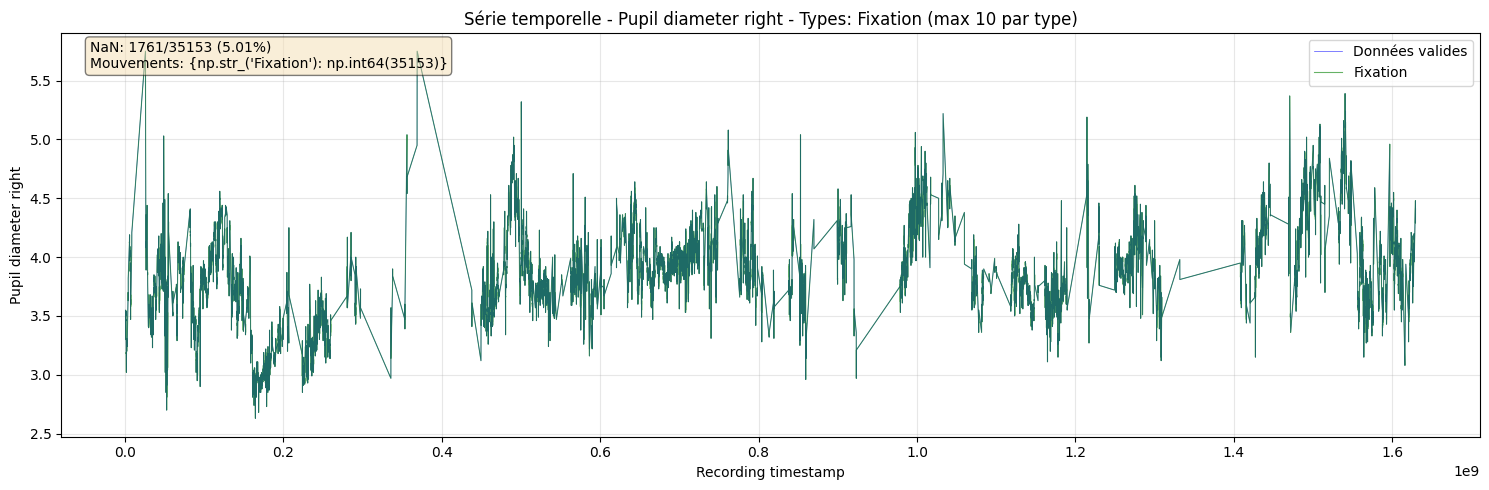

Filtrage par type de mouvement : ['Fixation']
  - Lignes totales : 63082
  - Lignes après filtrage : 35153
  - Limitation à 10 mouvements par type
  - Lignes après limitation : 35153


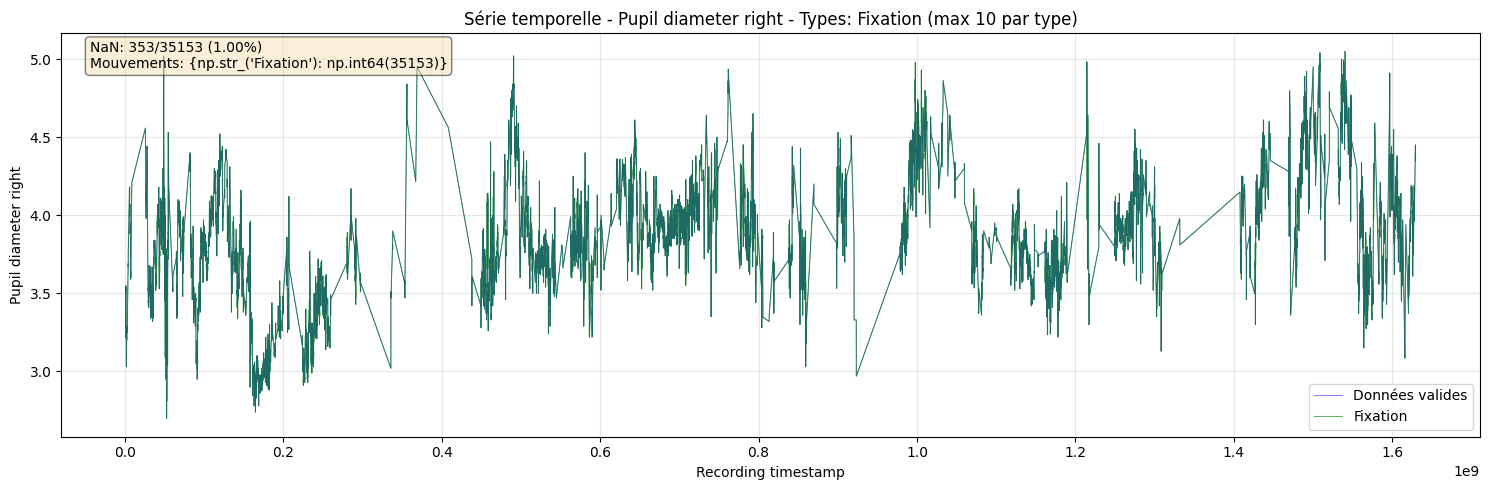

In [59]:
plot_column_timeseries(tobii_cleaned_0, column_index=19, eye_movement_types=['Fixation'], max_movements=10)
plot_column_timeseries(processed_df, column_index=1, eye_movement_types=['Fixation'], max_movements=10)